## Proyecto: Clasificación de riesgo de diabetes con Scikit-Learn 
Objetivo:
Construir un modelo de clasificación que prediga si una persona tiene riesgo de desarrollar diabetes, usando el conjunto de datos Pima Indians Diabetes.

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   

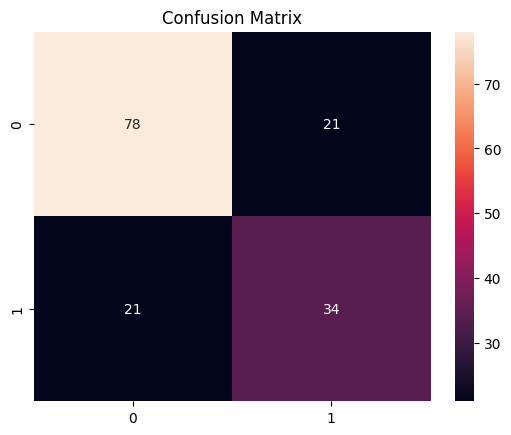

In [3]:
# 1. Importar librerías
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Cargar datos
df = pd.read_csv('diabetes.csv')

# 3. Exploración inicial
print(df.head())
print(df.describe())

# 4. Preprocesamiento
X = df.drop('Outcome', axis=1)
y = df['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Separar datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 6. Entrenamiento de modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# ✅ Validación cruzada con 5 particiones
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
print(f"Validación cruzada (5-fold) - Accuracy media: {cv_scores.mean():.3f}")
print(f"Accuracy por partición: {cv_scores}")

# 7. Evaluación
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))

# 8. Visualización
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()
